In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [2]:
data = pd.read_csv("acs/2010_full.csv")

In [3]:
for column in data.columns:
    if column == "Label": continue
    if "!!Estimate" not in column:
        data = data.drop(column, axis=1)
data

,Label,Alabama!!Estimate,Alaska!!Estimate,Arizona!!Estimate,Arkansas!!Estimate,California!!Estimate,Colorado!!Estimate,Connecticut!!Estimate,Delaware!!Estimate,District of Columbia!!Estimate,...,Tennessee!!Estimate,Texas!!Estimate,Utah!!Estimate,Vermont!!Estimate,Virginia!!Estimate,Washington!!Estimate,West Virginia!!Estimate,Wisconsin!!Estimate,Wyoming!!Estimate,Puerto Rico!!Estimate
0,SEX AND AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total population,"4,785,298","713,985","6,413,737","2,921,606","37,349,363","5,049,071","3,577,073","899,769","604,453",...,"6,356,897","25,257,114","2,776,469","625,960","8,024,617","6,744,496","1,853,973","5,691,047","564,460","3,722,133"
2,Male,"2,322,243","372,436","3,190,700","1,430,837","18,570,505","2,531,362","1,738,918","436,608","285,729",...,"3,095,030","12,531,720","1,397,849","308,172","3,941,957","3,358,423","913,160","2,826,199","287,053","1,785,266"
3,Female,"2,463,055","341,549","3,223,037","1,490,769","18,778,858","2,517,709","1,838,155","463,161","318,724",...,"3,261,867","12,725,394","1,378,620","317,788","4,082,660","3,386,073","940,813","2,864,848","277,407","1,936,867"
4,Under 5 years,"308,069","53,582","455,776","194,451","2,528,898","342,277","201,685","56,095","32,861",...,"406,413","1,929,338","263,603","32,268","507,432","438,209","101,877","355,052","41,020","223,247"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Some other race alone,"2,095","1,019","6,202","3,556","73,493","6,092","15,703","1,153",901,...,"4,972","37,760","3,295",691,"15,123","7,300",477,"3,548",190,"2,007"
81,Two or more races,"60,200","46,083","102,729","41,972","963,854","114,089","63,830","17,464","10,139",...,"95,418","325,940","48,952","9,604","183,860","252,110","32,281","93,991","8,095","3,538"
82,Two races including Some other race,"1,050",408,"3,341","1,149","52,268","4,947","5,769","1,044","1,016",...,"4,330","17,562","1,326",213,"7,938","8,847",364,"2,795",529,375
83,Two races excluding Some other rac...,"59,150","45,675","99,388","40,823","911,586","109,142","58,061","16,420","9,123",...,"91,088","308,378","47,626","9,391","175,922","243,263","31,917","91,196","7,566","3,163"


In [4]:
data = data.dropna()
data.index = np.arange(len(data.index))

In [5]:
# Renaming columns
data.columns = (data.columns.str.replace("!!Estimate", ""))

In [6]:
def p2f(s):
    try:
        return float(s)
    except ValueError:
        return 0

In [7]:
# converting all strings to float (if they arent a number they become 0)
for i in range(1, len(data.columns)):
    col = data.iloc[:, i].astype(str).str.replace('\D+', '').apply(p2f)
    data[data.columns[i]] = col

#removing as many 0 values as I can easily
data = data[data["Alabama"] > 0]
data

<ipython-input-7-5faf6aefb49f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data.columns[i]] = col


,Label,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Puerto Rico
0,Total population,4785298.0,713985.0,6413737.0,2921606.0,37349363.0,5049071.0,3577073.0,899769.0,604453.0,...,6356897.0,25257114.0,2776469.0,625960.0,8024617.0,6744496.0,1853973.0,5691047.0,564460.0,3722133.0
1,Male,2322243.0,372436.0,3190700.0,1430837.0,18570505.0,2531362.0,1738918.0,436608.0,285729.0,...,3095030.0,12531720.0,1397849.0,308172.0,3941957.0,3358423.0,913160.0,2826199.0,287053.0,1785266.0
2,Female,2463055.0,341549.0,3223037.0,1490769.0,18778858.0,2517709.0,1838155.0,463161.0,318724.0,...,3261867.0,12725394.0,1378620.0,317788.0,4082660.0,3386073.0,940813.0,2864848.0,277407.0,1936867.0
3,Under 5 years,308069.0,53582.0,455776.0,194451.0,2528898.0,342277.0,201685.0,56095.0,32861.0,...,406413.0,1929338.0,263603.0,32268.0,507432.0,438209.0,101877.0,355052.0,41020.0,223247.0
4,5 to 9 years,309658.0,49870.0,448623.0,195858.0,2536654.0,354521.0,222475.0,56077.0,27268.0,...,407902.0,1939137.0,249502.0,32676.0,509030.0,437222.0,107557.0,362759.0,38708.0,236531.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,Some other race alone,2095.0,1019.0,6202.0,3556.0,73493.0,6092.0,15703.0,1153.0,901.0,...,4972.0,37760.0,3295.0,691.0,15123.0,7300.0,477.0,3548.0,190.0,2007.0
77,Two or more races,60200.0,46083.0,102729.0,41972.0,963854.0,114089.0,63830.0,17464.0,10139.0,...,95418.0,325940.0,48952.0,9604.0,183860.0,252110.0,32281.0,93991.0,8095.0,3538.0
78,Two races including Some other race,1050.0,408.0,3341.0,1149.0,52268.0,4947.0,5769.0,1044.0,1016.0,...,4330.0,17562.0,1326.0,213.0,7938.0,8847.0,364.0,2795.0,529.0,375.0
79,Two races excluding Some other rac...,59150.0,45675.0,99388.0,40823.0,911586.0,109142.0,58061.0,16420.0,9123.0,...,91088.0,308378.0,47626.0,9391.0,175922.0,243263.0,31917.0,91196.0,7566.0,3163.0


In [8]:
#discarding PR for electoral vote file
data = data.drop('Puerto Rico', axis = 1)

In [9]:
#reindexing again to organize 
data.index = np.arange(len(data.index))

In [10]:
#copies comes in because now I can create the expected array rn
copies = data.drop("Label", axis = 1)

#expected array
expected = copies.sum(axis=1) / copies.sum(axis = 1)[0] * 538

In [11]:
#now splitting up data on a per-capita basis
total_pop=data.iloc[0]

for i in range(1, len(data.columns)):
    col = data.iloc[:, i] / total_pop[i]
    data[data.columns[i]] = col

data

,Label,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Total population,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,Male,0.485287,0.521630,0.497479,0.489743,0.497211,0.501352,0.486129,0.485245,0.472707,...,0.503599,0.486877,0.496166,0.503463,0.492319,0.491233,0.497950,0.492542,0.496604,0.508544
2,Female,0.514713,0.478370,0.502521,0.510257,0.502789,0.498648,0.513871,0.514755,0.527293,...,0.496401,0.513123,0.503834,0.496537,0.507681,0.508767,0.502050,0.507458,0.503396,0.491456
3,Under 5 years,0.064378,0.075046,0.071062,0.066556,0.067709,0.067790,0.056383,0.062344,0.054365,...,0.070411,0.063933,0.076388,0.094942,0.051550,0.063234,0.064973,0.054951,0.062388,0.072671
4,5 to 9 years,0.064710,0.069847,0.069947,0.067038,0.067917,0.070215,0.062195,0.062324,0.045112,...,0.063225,0.064167,0.076776,0.089863,0.052201,0.063434,0.064826,0.058014,0.063742,0.068575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Some other race alone,0.000438,0.001427,0.000967,0.001217,0.001968,0.001207,0.004390,0.001281,0.001491,...,0.000464,0.000782,0.001495,0.001187,0.001104,0.001885,0.001082,0.000257,0.000623,0.000337
69,Two or more races,0.012580,0.064543,0.016017,0.014366,0.025806,0.022596,0.017844,0.019409,0.016774,...,0.017598,0.015010,0.012905,0.017631,0.015343,0.022912,0.037380,0.017412,0.016516,0.014341
70,Two races including Some other race,0.000219,0.000571,0.000521,0.000393,0.001399,0.000980,0.001613,0.001160,0.001681,...,0.000671,0.000681,0.000695,0.000478,0.000340,0.000989,0.001312,0.000196,0.000491,0.000937
71,Two races excluding Some other rac...,0.012361,0.063972,0.015496,0.013973,0.024407,0.021616,0.016231,0.018249,0.015093,...,0.016927,0.014329,0.012210,0.017153,0.015003,0.021923,0.036068,0.017215,0.016024,0.013404


In [12]:
electorals = pd.read_csv("Data/state_data")
diaspora = electorals["E.C. Votes"] 

for i in range(1, len(data.columns)):
    col = data.iloc[:, i] * diaspora[i-1]
    data[data.columns[i]] = col
data

,Label,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,Total population,9.000000,3.000000,11.000000,6.000000,55.000000,9.000000,7.000000,3.000000,3.000000,...,3.000000,11.000000,38.000000,6.000000,3.000000,13.000000,12.000000,5.000000,10.000000,3.000000
1,Male,4.367583,1.564890,5.472270,2.938460,27.346592,4.512168,3.402901,1.455734,1.418120,...,1.510797,5.355652,18.854306,3.020777,1.476957,6.386030,5.975402,2.462711,4.966044,1.525633
2,Female,4.632417,1.435110,5.527730,3.061540,27.653408,4.487832,3.597099,1.544266,1.581880,...,1.489203,5.644348,19.145694,2.979223,1.523043,6.613970,6.024598,2.537289,5.033956,1.474367
3,Under 5 years,0.579404,0.225139,0.781687,0.399337,3.724010,0.610111,0.394679,0.187031,0.163095,...,0.211233,0.703259,2.902740,0.569651,0.154649,0.822047,0.779674,0.274753,0.623878,0.218014
4,5 to 9 years,0.582393,0.209542,0.769419,0.402227,3.735431,0.631936,0.435363,0.186971,0.135336,...,0.189675,0.705835,2.917483,0.539178,0.156604,0.824636,0.777918,0.290072,0.637420,0.205726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Some other race alone,0.003940,0.004282,0.010637,0.007303,0.108224,0.010859,0.030729,0.003844,0.004472,...,0.001393,0.008604,0.056811,0.007121,0.003312,0.024499,0.012988,0.001286,0.006234,0.001010
69,Two or more races,0.113222,0.193630,0.176187,0.086196,1.419354,0.203364,0.124909,0.058228,0.050322,...,0.052794,0.165112,0.490385,0.105786,0.046029,0.297856,0.448561,0.087059,0.165156,0.043023
70,Two races including Some other race,0.001975,0.001714,0.005730,0.002360,0.076969,0.008818,0.011289,0.003481,0.005043,...,0.002014,0.007493,0.026422,0.002866,0.001021,0.012860,0.015741,0.000982,0.004911,0.002812
71,Two races excluding Some other rac...,0.111247,0.191916,0.170457,0.083837,1.342385,0.194546,0.113620,0.054747,0.045279,...,0.050780,0.157619,0.463963,0.102921,0.045008,0.284996,0.432820,0.086077,0.160245,0.040212


In [13]:
#isolate the list of states to perform arithmetic on
states = list(data)
states.remove("Label")
data[states]

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,9.000000,3.000000,11.000000,6.000000,55.000000,9.000000,7.000000,3.000000,3.000000,29.000000,...,3.000000,11.000000,38.000000,6.000000,3.000000,13.000000,12.000000,5.000000,10.000000,3.000000
1,4.367583,1.564890,5.472270,2.938460,27.346592,4.512168,3.402901,1.455734,1.418120,14.178171,...,1.510797,5.355652,18.854306,3.020777,1.476957,6.386030,5.975402,2.462711,4.966044,1.525633
2,4.632417,1.435110,5.527730,3.061540,27.653408,4.487832,3.597099,1.544266,1.581880,14.821829,...,1.489203,5.644348,19.145694,2.979223,1.523043,6.613970,6.024598,2.537289,5.033956,1.474367
3,0.579404,0.225139,0.781687,0.399337,3.724010,0.610111,0.394679,0.187031,0.163095,1.643637,...,0.211233,0.703259,2.902740,0.569651,0.154649,0.822047,0.779674,0.274753,0.623878,0.218014
4,0.582393,0.209542,0.769419,0.402227,3.735431,0.631936,0.435363,0.186971,0.135336,1.664266,...,0.189675,0.705835,2.917483,0.539178,0.156604,0.824636,0.777918,0.290072,0.637420,0.205726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.003940,0.004282,0.010637,0.007303,0.108224,0.010859,0.030729,0.003844,0.004472,0.077921,...,0.001393,0.008604,0.056811,0.007121,0.003312,0.024499,0.012988,0.001286,0.006234,0.001010
69,0.113222,0.193630,0.176187,0.086196,1.419354,0.203364,0.124909,0.058228,0.050322,0.435209,...,0.052794,0.165112,0.490385,0.105786,0.046029,0.297856,0.448561,0.087059,0.165156,0.043023
70,0.001975,0.001714,0.005730,0.002360,0.076969,0.008818,0.011289,0.003481,0.005043,0.034697,...,0.002014,0.007493,0.026422,0.002866,0.001021,0.012860,0.015741,0.000982,0.004911,0.002812
71,0.111247,0.191916,0.170457,0.083837,1.342385,0.194546,0.113620,0.054747,0.045279,0.400513,...,0.050780,0.157619,0.463963,0.102921,0.045008,0.284996,0.432820,0.086077,0.160245,0.040212


In [14]:
data["Expected"] = expected
data["Actual"] = data[states].sum(axis=1)
data

,Label,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Expected,Actual
0,Total population,9.000000,3.000000,11.000000,6.000000,55.000000,9.000000,7.000000,3.000000,3.000000,...,38.000000,6.000000,3.000000,13.000000,12.000000,5.000000,10.000000,3.000000,538.000000,538.000000
1,Male,4.367583,1.564890,5.472270,2.938460,27.346592,4.512168,3.402901,1.455734,1.418120,...,18.854306,3.020777,1.476957,6.386030,5.975402,2.462711,4.966044,1.525633,264.503657,264.660123
2,Female,4.632417,1.435110,5.527730,3.061540,27.653408,4.487832,3.597099,1.544266,1.581880,...,19.145694,2.979223,1.523043,6.613970,6.024598,2.537289,5.033956,1.474367,273.496343,273.339877
3,Under 5 years,0.579404,0.225139,0.781687,0.399337,3.724010,0.610111,0.394679,0.187031,0.163095,...,2.902740,0.569651,0.154649,0.822047,0.779674,0.274753,0.623878,0.218014,35.015588,34.996722
4,5 to 9 years,0.582393,0.209542,0.769419,0.402227,3.735431,0.631936,0.435363,0.186971,0.135336,...,2.917483,0.539178,0.156604,0.824636,0.777918,0.290072,0.637420,0.205726,35.463443,35.369412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Some other race alone,0.003940,0.004282,0.010637,0.007303,0.108224,0.010859,0.030729,0.003844,0.004472,...,0.056811,0.007121,0.003312,0.024499,0.012988,0.001286,0.006234,0.001010,0.970803,0.937921
69,Two or more races,0.113222,0.193630,0.176187,0.086196,1.419354,0.203364,0.124909,0.058228,0.050322,...,0.490385,0.105786,0.046029,0.297856,0.448561,0.087059,0.165156,0.043023,10.624127,10.992593
70,Two races including Some other race,0.001975,0.001714,0.005730,0.002360,0.076969,0.008818,0.011289,0.003481,0.005043,...,0.026422,0.002866,0.001021,0.012860,0.015741,0.000982,0.004911,0.002812,0.527634,0.518253
71,Two races excluding Some other rac...,0.111247,0.191916,0.170457,0.083837,1.342385,0.194546,0.113620,0.054747,0.045279,...,0.463963,0.102921,0.045008,0.284996,0.432820,0.086077,0.160245,0.040212,10.096494,10.474340


In [15]:
eva = pd.DataFrame({
    "Delta": data.Actual - data.Expected
})
eva.index = data.Label.str.strip()
eva

,Delta
Label,
Total population,0.000000
Male,0.156466
Female,-0.156466
Under 5 years,-0.018866
5 to 9 years,-0.094031
...,...
Some other race alone,-0.032882
Two or more races,0.368466
Two races including Some other race,-0.009381


In [16]:
print(eva.to_string())

                                                                    Delta
Label                                                                    
Total population                                                 0.000000
Male                                                             0.156466
Female                                                          -0.156466
Under 5 years                                                   -0.018866
5 to 9 years                                                    -0.094031
10 to 14 years                                                  -0.108454
15 to 19 years                                                  -0.048563
20 to 24 years                                                   0.055245
25 to 34 years                                                  -0.096438
35 to 44 years                                                  -0.339439
45 to 54 years                                                   0.070783
55 to 59 years                        

In [17]:
race = eva.loc["White alone":"Asian alone"].append(eva.loc["Hispanic or Latino (of any race)"])
race

,Delta
Label,
White alone,6.923398
Black or African American alone,-1.492582
American Indian and Alaska Native alone,0.758135
Asian alone,-1.050243
Hispanic or Latino (of any race),-5.635275


In [31]:
gender = eva.iloc[1:3]
gender

,Delta
Label,
Male,0.156466
Female,-0.156466


In [19]:
age = eva.loc["15 to 19 years": "75 to 84 years"]
age

,Delta
Label,
15 to 19 years,-0.048563
20 to 24 years,0.055245
25 to 34 years,-0.096438
35 to 44 years,-0.339439
45 to 54 years,0.070783
55 to 59 years,0.202951
60 to 64 years,0.158791
65 to 74 years,0.136075
75 to 84 years,0.053725


In [25]:
def plot(demographic, title):
    ax = sns.barplot(x=demographic.index, y=demographic.Delta)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
    ax.set_xlabel(title)

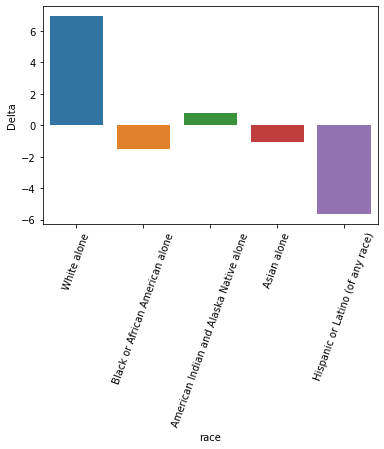

In [26]:
plot(race, "race")

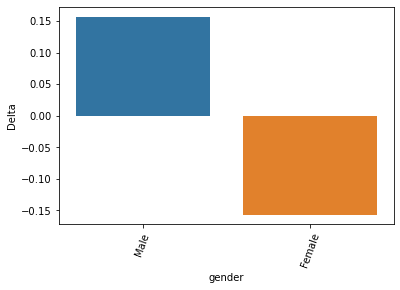

In [27]:
plot(gender, "gender")

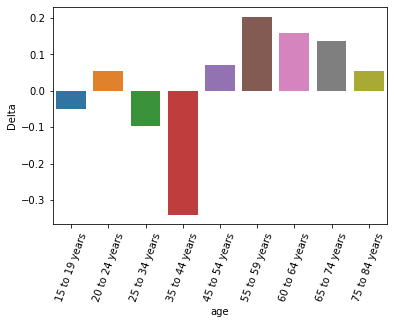

In [28]:
plot(age, "age")

In [30]:
final  = race.append(age).append(gender)
final

,Delta
Label,
White alone,6.923398
Black or African American alone,-1.492582
American Indian and Alaska Native alone,0.758135
Asian alone,-1.050243
Hispanic or Latino (of any race),-5.635275
15 to 19 years,-0.048563
20 to 24 years,0.055245
25 to 34 years,-0.096438
35 to 44 years,-0.339439
